## Mystery Planet RV Fitting

In [18]:
using PyPlot
using LsqFit

In [19]:
data = readdlm("mystery_planet_1.txt") ;

In [22]:
time = data[:,1]
rv = data[:,2]
err = data[:,3] ;

In [23]:
#Kepler's equation solver function from Homework 1
function Kepler(M, e)
    E_old = M
    epsilon = 1.0
    while epsilon > 1.0E-12
        g = E_old - e*sin(E_old) - M
        g_prime = 1.0 - e*cos(E_old)
        E_new = E_old - (g/g_prime)
        epsilon = abs(E_old - E_new)
        E_old = E_new
    end
    return E_old
end

Kepler (generic function with 1 method)

In [24]:
function Period(time, rv)
    num = 3000
    periods = linspace(50.0, 300.0, num)
    chisq = ones(num)
    for i in range(1, num)
        mods = mod(time, periods[i])
        ind = sortperm(mods)
        newrv = rv[ind]
        sum = 0.0
        for k in range(1,length(time)-1)
            sum += (newrv[k+1]-newrv[k])^2.
        end
        chisq[i] = sum
    end
    #scatter(periods,chisq)
    #yscale("log")
    
    return periods[indmin(chisq)] 
end

Period (generic function with 1 method)

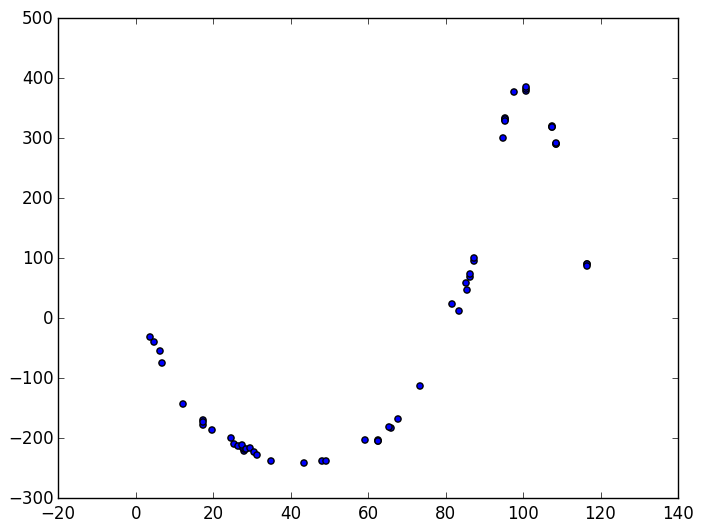

PyObject <matplotlib.collections.PathCollection object at 0x31524b510>

In [25]:
per = Period(time,rv)
scatter(mod(time,per),rv)

In [26]:
#Define parameter vector p[Period1, eccentricity2, time of periastron3, h4, c5, v_06]

function vrad(t, p)
    rv_model = zeros(length(t))
    if (p[2] >= 1) || (p[2] < 0)
      return rv_model
    end
    for i in range(1, length(t))
        M = 2.0*pi / p[1] * (t[i] - p[3])
        E = Kepler(M, p[2])
        f = 2.0 * atan(((1.0 + p[2])/(1.0 - p[2]))^0.5 * tan(E/2.0))
        rv_model[i] = p[4]*cos(f) + p[5]*sin(f) + p[6]
    end
    return rv_model
end



vrad (generic function with 1 method)

In [27]:
#p = [period, ecc, t_peri, h, c, v0]
#Define initial guesses:
K = (maximum(rv)-minimum(rv))/2

p = ones(6)
p[1] = per
p[2] = 0.5
p[3] = rand()*per
p[4] = K/2
p[5] = K/2
p[6] = 1.0

errors = 1.0./(err.^2.0);
println(typeof(errors))
#vrad_model = vrad(time, p)
#scatter(time,rv)
#plot(time,vrad_model)

Array{Float64,1}


In [29]:
fit = curve_fit(vrad,time,rv,p)
vfit = vrad(time,fit.param) ;

In [39]:
println("Parameters: ")
println("Period = ", fit.param[1])
println("Eccentricity = ", fit.param[2])
println("Time of Periastron = ", fit.param[3])

Parameters: 
Period = 116.68109253772053
Eccentricity = 0.40130863290687
Time of Periastron = 6.326219584609994


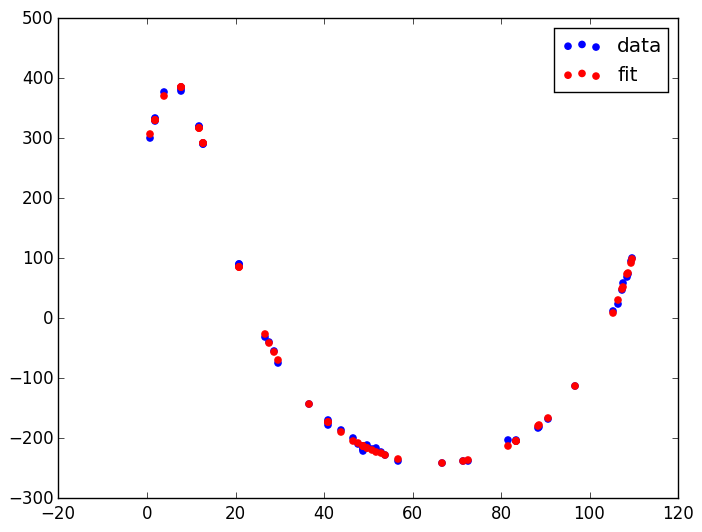

PyObject <matplotlib.legend.Legend object at 0x316a39d50>

In [37]:
scatter(mod(time,fit.param[1]),rv, color="b", label="data")
scatter(mod(time,fit.param[1]),vfit,color="r", label="fit")
legend()

## f and g functions

In [43]:
G = 6.67259E-8 #Gravitational Constant in cgs

per = fit.param[1]
ecc = fit.param[2]
t_peri = fit.param[3]

t0 = time[1]
M0 = 2.0*pi / per * (t0 - t_peri)
E0 = Kepler(M0, ecc)
v0 = fit.param[6]
a = (G*mass*(per / (2*pi)^2.0))^(1./3.)
r0 = (a, 0.0)

function f_func(t, t0, M, a)
    E = Kepler(M, ecc)
    return a / r0 * (cos(E - E0)+1.0)
end

function g_func(t, t0, M, a)
    E = Kepler(M, ecc)
    first = t - t0
    second = per/(2*pi) * (sin(E-E0) - (E-E0))
    return first + second
end
    

LoadError: LoadError: UndefVarError: mass not defined
while loading In[43], in expression starting on line 11